In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC


In [3]:
df = pd.read_excel('Fracability_Dataset.xlsx')

In [4]:
df.head().style.background_gradient(cmap='ocean')

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,1
1,9370.348405,577.253950,15.403192,324.750529,0.497242,0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,1
4,18861.977710,614.959877,18.048478,480.189015,1.171049,1


In [5]:
df.shape

(1000, 6)

In [6]:
df.dtypes

MD_ft                                 float64
Resistivity                           float64
YM/PR                                 float64
GR                                    float64
Minimum Horizontal Stress Gradient    float64
Fracability                             int64
dtype: object

In [8]:
#check missing values
df.isna().sum()

MD_ft                                 0
Resistivity                           0
YM/PR                                 0
GR                                    0
Minimum Horizontal Stress Gradient    0
Fracability                           0
dtype: int64

In [9]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
MD_ft,1000.000000,14000.000000,4269.740397,2571.139190,10943.676726,13864.280896,17149.039581,25382.097071
Resistivity,1000.000000,500.000000,179.604705,-2.624400,364.746085,497.077253,620.324542,970.103975
YM/PR,1000.000000,24.000000,8.388762,4.917917,17.708133,23.399724,29.588017,49.567271
GR,1000.000000,300.000000,122.443017,-2.296323,210.515488,302.737171,387.137024,627.305824
Minimum Horizontal Stress Gradient,1000.000000,0.926601,0.234990,0.292125,0.747472,0.932445,1.106538,1.508552
Fracability,1000.000000,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [10]:
df.columns

Index(['MD_ft', 'Resistivity', 'YM/PR', 'GR',
       'Minimum Horizontal Stress Gradient', 'Fracability'],
      dtype='object')

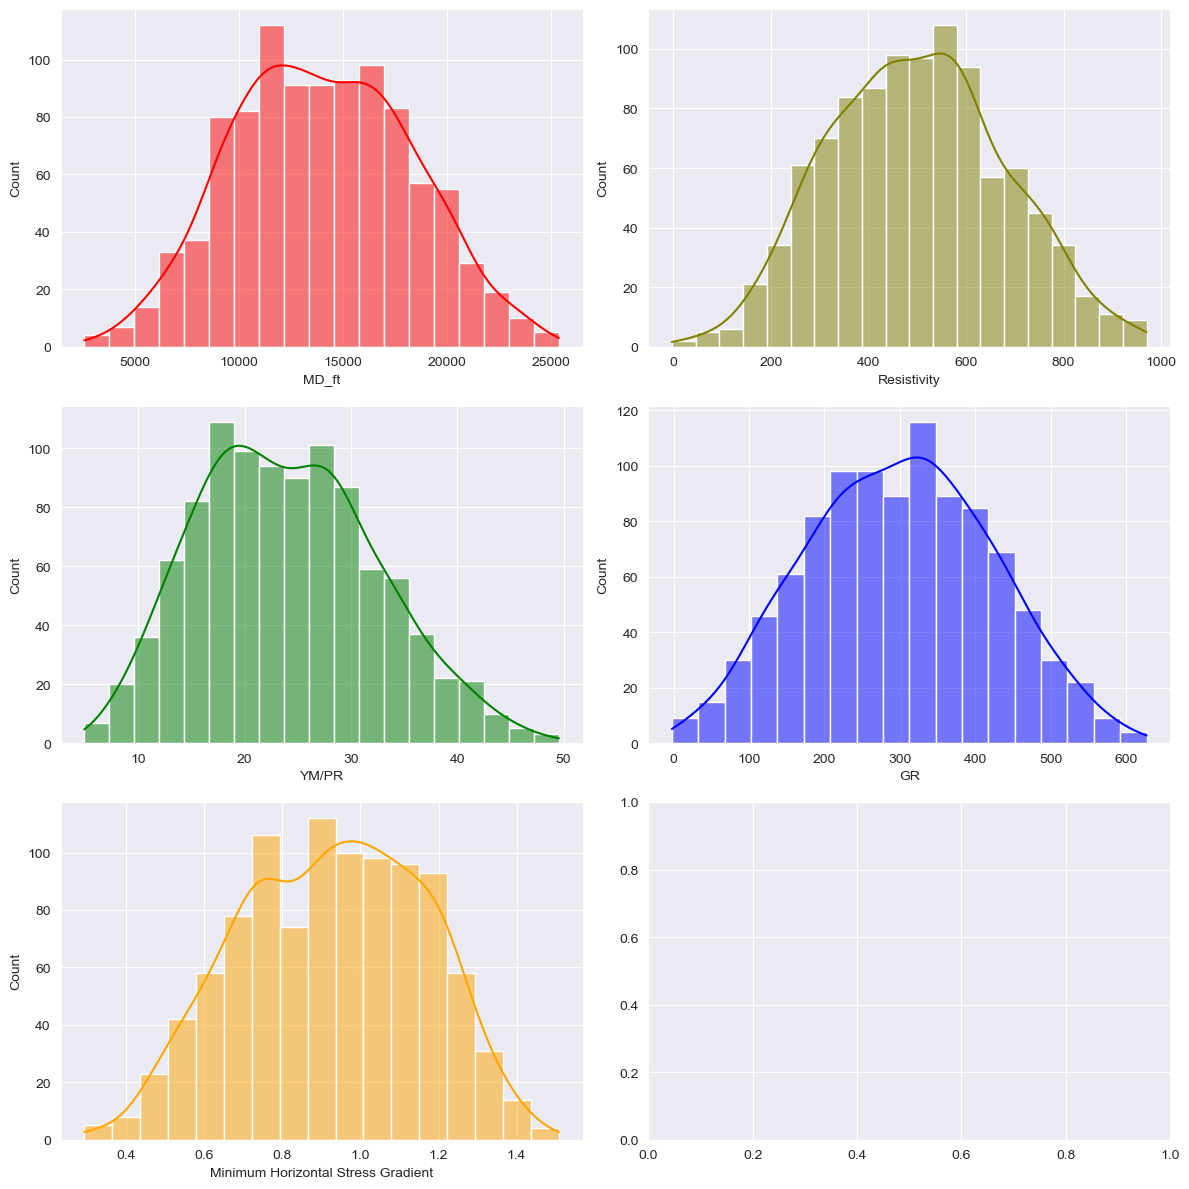

In [11]:
f, axes = plt.subplots(3,2, figsize=(12,12))
sns.histplot(df['MD_ft'], kde=True,color='red',ax=axes[0,0])
sns.histplot(df['Resistivity'], kde=True,color='olive',ax=axes[0,1])
sns.histplot(df['YM/PR'], kde=True,color='green',ax=axes[1,0])
sns.histplot(df['GR'],kde=True, color='blue',ax=axes[1,1])
sns.histplot(df['Minimum Horizontal Stress Gradient'],kde=True, color='orange',ax=axes[2,0])

plt.tight_layout()


- Almost of all the colmns has normal distribution


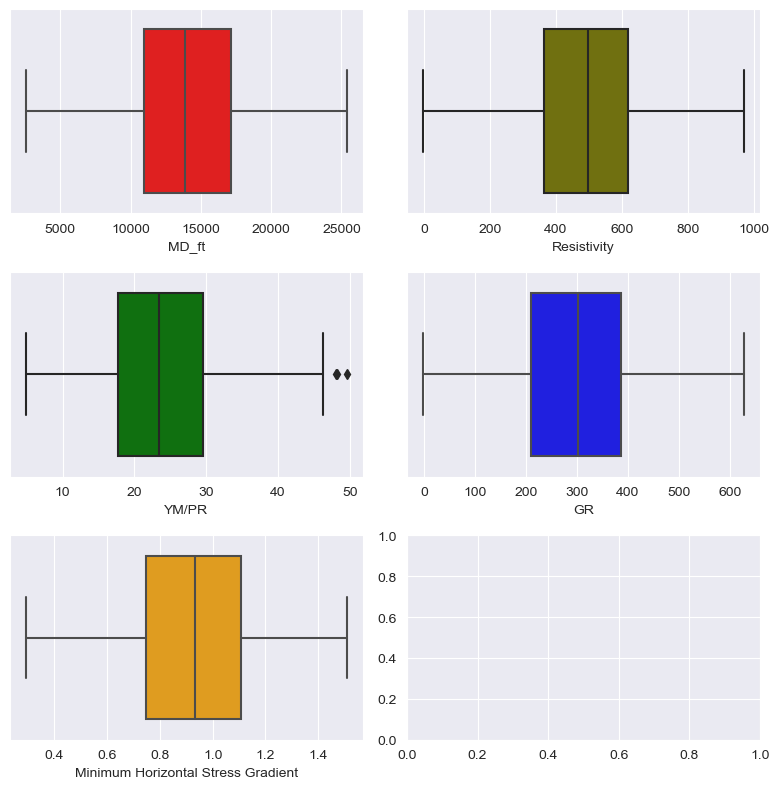

In [14]:
f, axes = plt.subplots(3,2, figsize=(8,8))
sns.boxplot(x=df['MD_ft'],color='red',ax=axes[0,0])
sns.boxplot(x=df['Resistivity'],color='olive',ax=axes[0,1])
sns.boxplot(x=df['YM/PR'],color='green',ax=axes[1,0])
sns.boxplot(x=df['GR'], color='blue',ax=axes[1,1])
sns.boxplot(x=df['Minimum Horizontal Stress Gradient'], color='orange',ax=axes[2,0])

plt.tight_layout()

- Only YM/PR column has 2 outliers

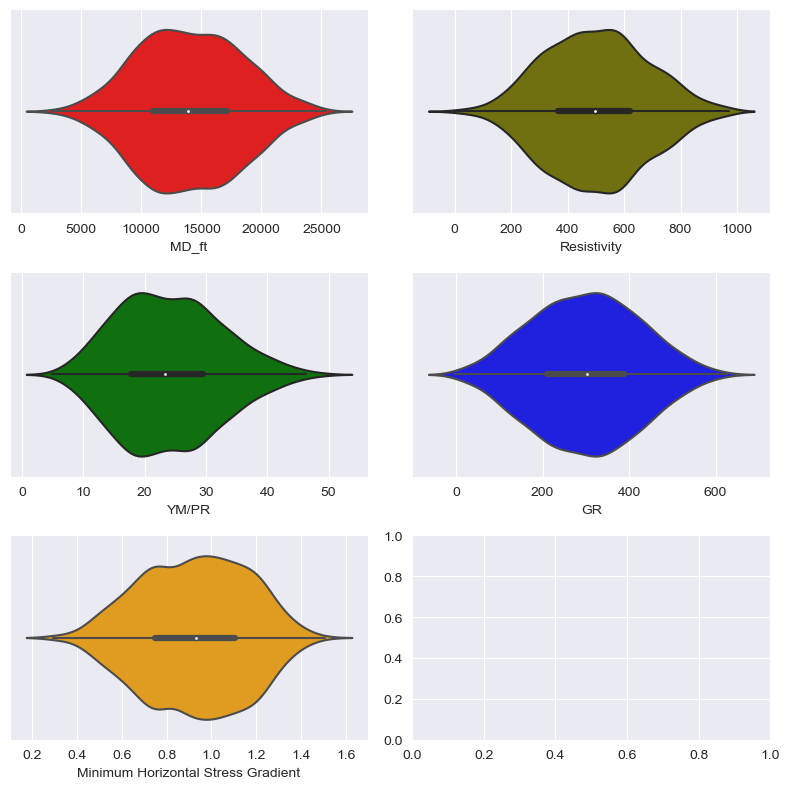

In [16]:
f, axes = plt.subplots(3,2, figsize=(8,8))
sns.violinplot(x=df['MD_ft'],color='red',ax=axes[0,0])
sns.violinplot(x=df['Resistivity'],color='olive',ax=axes[0,1])
sns.violinplot(x=df['YM/PR'],color='green',ax=axes[1,0])
sns.violinplot(x=df['GR'], color='blue',ax=axes[1,1])
sns.violinplot(x=df['Minimum Horizontal Stress Gradient'], color='orange',ax=axes[2,0])

plt.tight_layout()

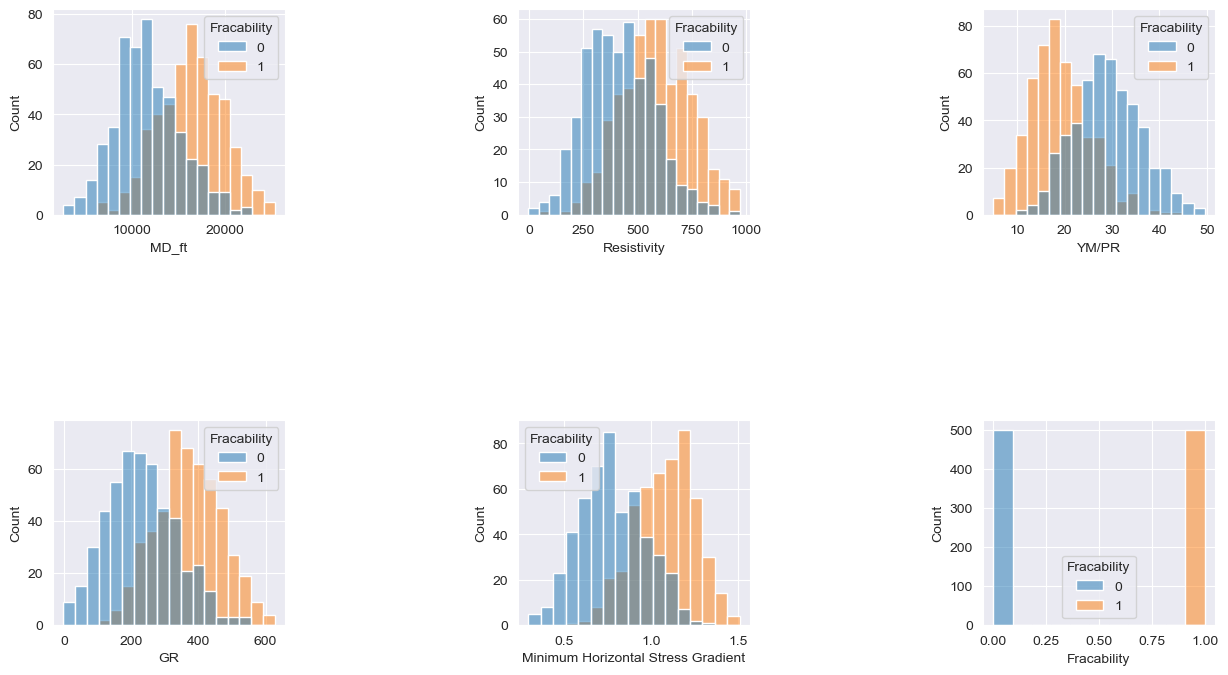

In [21]:
# histplot of the columns in the dataset 
num_col =df.select_dtypes(exclude='object').columns
fig,ax =plt.subplots(2,3, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //3, idx % 3
    sns.histplot(x=num_col, data=df,hue='Fracability', ax=ax[row,col])
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

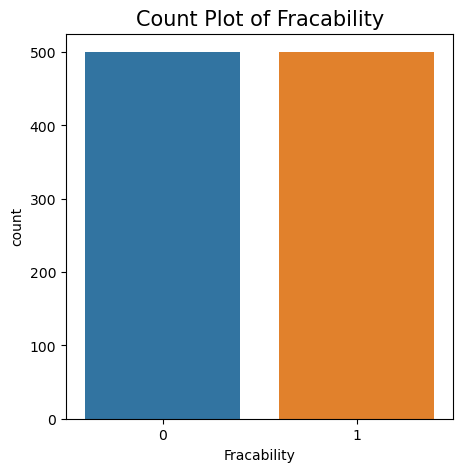

In [23]:
plt.figure(figsize=(5,5))
plt.style.use('default')
sns.countplot(x=df['Fracability'])
plt.title('Count Plot of Fracability', size=15)

plt.show()

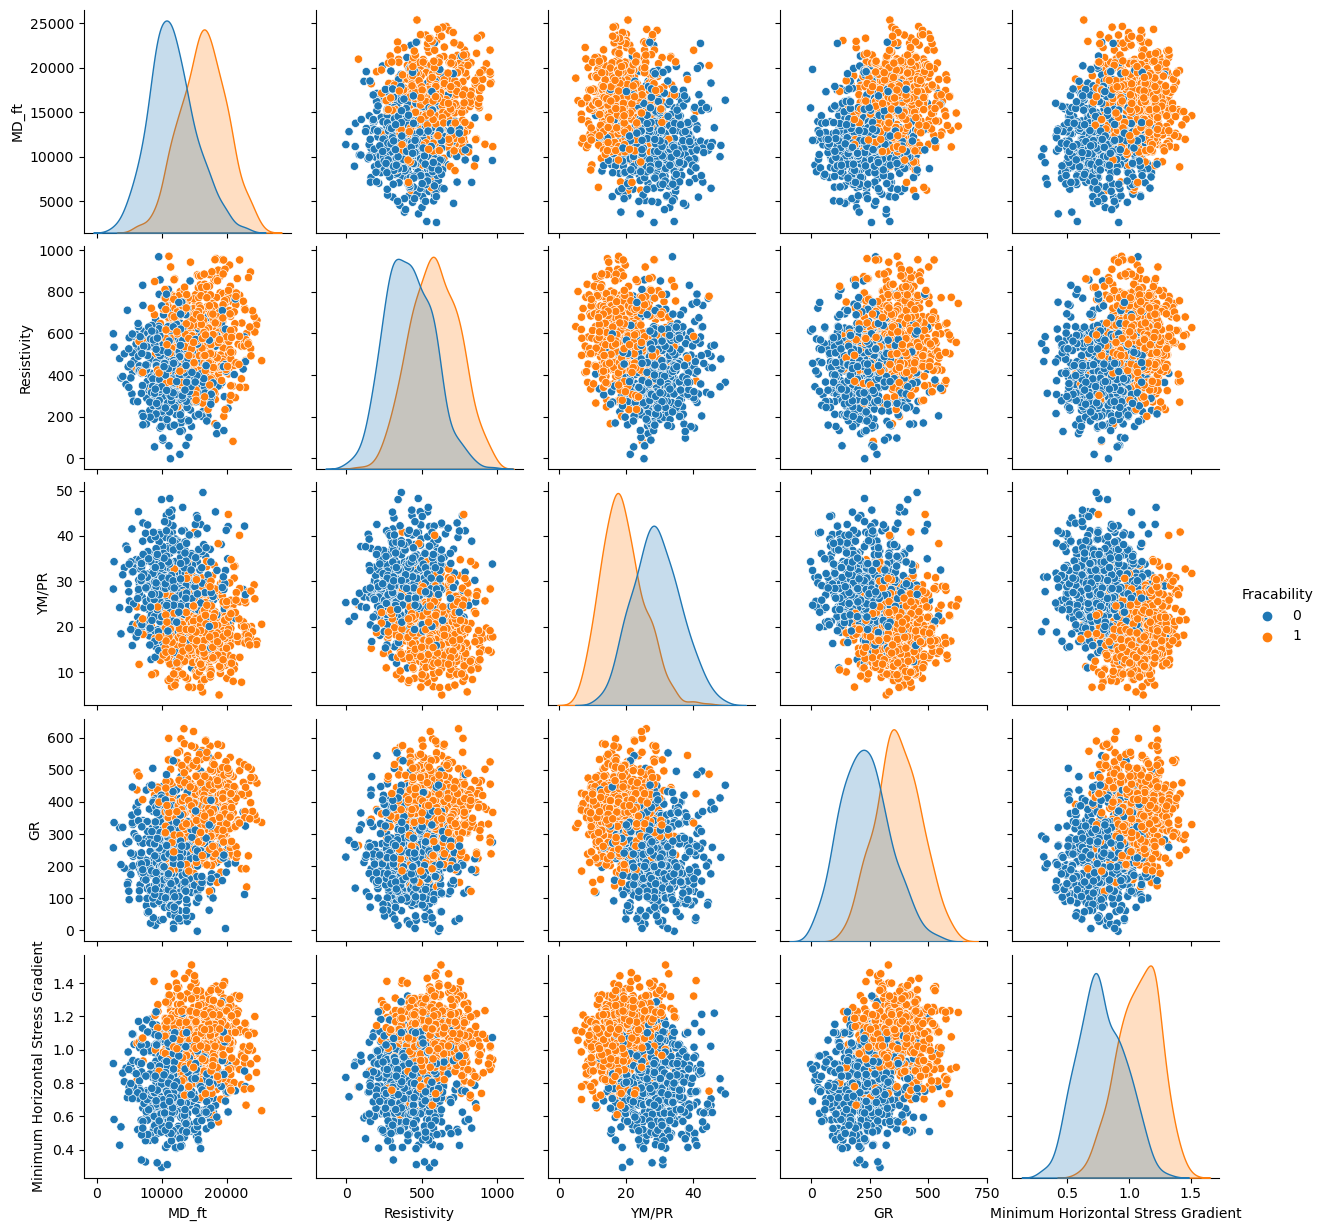

In [27]:
sns.pairplot(df,hue='Fracability')
plt.show()

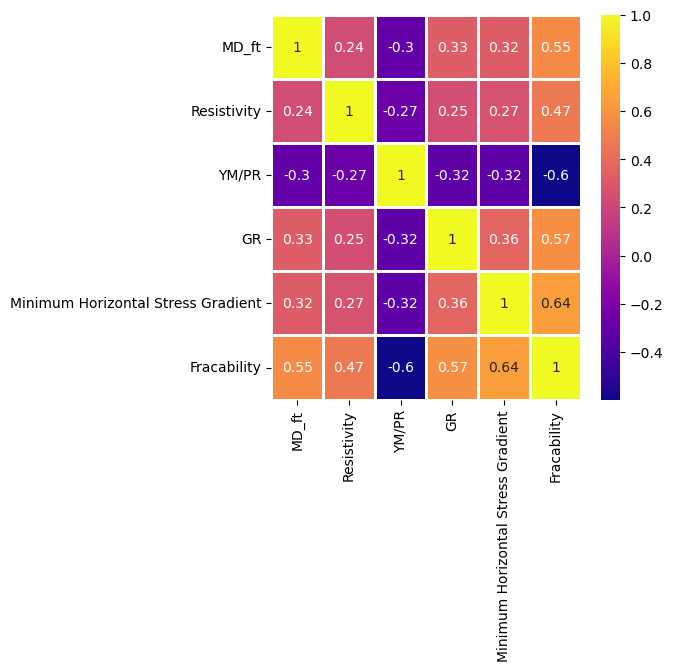

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),lw=2, annot=True,cmap='plasma')
plt.show()

- Only YM/PR is correlating with the target, Fracability negatively. The rest of the columns correlate with the target positively

### Data Preprocessing

In [30]:
# scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


In [31]:
Y = df['Fracability']
X=df.drop(['Fracability'],axis=1)

#### Train Test Split

In [32]:
seed=50
np.random.seed(seed)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [33]:
# scaling the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Building Models

### Support Vector Machine

In [35]:
np.random.seed(seed)

svm = SVC()
# train the model
svm.fit(x_train,y_train)

SVC()

In [36]:
svm_pred = svm.predict(x_test)

In [40]:
cm = confusion_matrix(y_test,svm_pred)
print('Accuracy Score:', accuracy_score(y_test,svm_pred))
print("Train score:",svm.score(x_train,y_train))
print('\nConfusion Matrix:')
print(cm)

Accuracy Score: 0.952
Train score: 0.9453333333333334

Confusion Matrix:
[[111   5]
 [  7 127]]


In [41]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       116
           1       0.96      0.95      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [42]:
pd.crosstab(y_test,svm_pred)

col_0,0,1
Fracability,,
0,111,5
1,7,127


## Let's improve the SVC model using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [45]:
grid = GridSearchCV(SVC(),params_grid,refit=True,verbose=3)

In [46]:
# Train the model again

grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
grid_pred = grid.predict(x_test)

In [53]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [54]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [55]:
grid.best_score_

0.932

In [56]:
print('Crosstab:')
print('Accuracy Score:', accuracy_score(y_test,grid_pred))
pd.crosstab(y_test,grid_pred)

Crosstab:
Accuracy Score: 0.952


col_0,0,1
Fracability,,
0,112,4
1,8,126


In [57]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       116
           1       0.97      0.94      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



<Axes: >

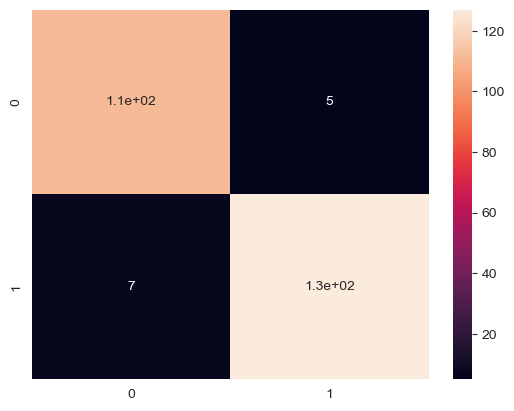

In [58]:
sns.heatmap(cm,annot=True)

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(max_depth=3)
#train the rf model
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
print("Test score",accuracy_score(y_test,rf_pred))
print("Train score:",rf.score(x_train,y_train))

Test score 0.936
Train score: 0.9453333333333334


In [65]:
pd.crosstab(y_test,rf_pred)


col_0,0,1
Fracability,,
0,108,8
1,8,126


The accuracy score of the model is 94%

<Axes: >

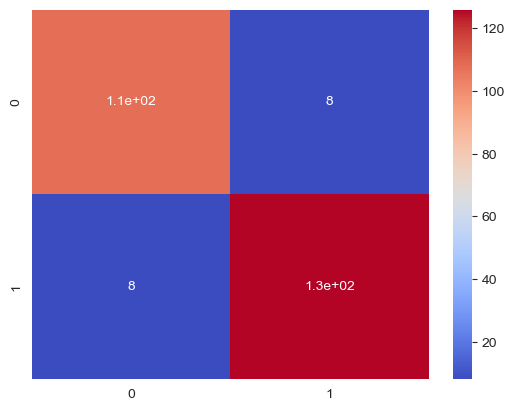

In [66]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,cmap='coolwarm')


### DecisionTreeClassifier

In [78]:
tree_model = DecisionTreeClassifier(max_depth=4)
#train the rf model
tree_model.fit(x_train,y_train)
tree_pred =tree_model.predict(x_test)
print("Test score",accuracy_score(y_test,tree_pred))
print("Train score:",tree_model.score(x_train,y_train))

Test score 0.884
Train score: 0.9373333333333334


### LogisticRegression

In [76]:
logr = LogisticRegression()
#train the rf model
logr.fit(x_train,y_train)
logr_pred =logr.predict(x_test)
print("Test score",accuracy_score(y_test,logr_pred))
print("Train score:",logr.score(x_train,y_train))

Test score 0.948
Train score: 0.932


### GradientBoostingClassifier

In [80]:
g_model =GradientBoostingClassifier(learning_rate=0.03)
#train the rf model
g_model.fit(x_train,y_train)
g_pred =g_model.predict(x_test)
print("Test score",accuracy_score(y_test,g_pred))
print("Train score:",g_model.score(x_train,y_train))

Test score 0.924
Train score: 0.9786666666666667


### AdaBoostClassifier

In [74]:
ab_model =AdaBoostClassifier()
#train the rf model
ab_model.fit(x_train,y_train)
ab_pred =ab_model.predict(x_test)
print("Test score",accuracy_score(y_test,ab_pred))
print("Train score:",ab_model.score(x_train,y_train))

Test score 0.944
Train score: 0.9533333333333334


### RidgeClassifier

In [73]:
ridge =RidgeClassifier()
#train the rf model
ridge.fit(x_train,y_train)
rg_pred =ridge.predict(x_test)
print("Test score",accuracy_score(y_test,rg_pred))
print("Train score:",ridge.score(x_train,y_train))

Test score 0.952
Train score: 0.928
